# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

propósito del proyecto: Realizar al analisis de la información proporcionada por la empresa para facilitar la toma de decisiones, y así saber cual de los planes genera mayores ingresos y realizar los cambios correspondientes a la publicidad y en cuales invertir mayores recursos. 

acciones que planeas realizar: Se realiza la verificación de cada uno de los archivos, conocer la información y realizar el preparación de los datos, de tal manera que, podamos confiar en los resultados obtenidos. Revisar los valores ausentes, los tipos de datos, revisar que tipo de distribución sigue la información, conocer las tendencias de los datos, detectar los valores que son raros, realizar comparaciones o agregación de datos para conocer mejor la información y así plantearnos hipotesis que podamos responder o estimar. 

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [100]:
# Cargar todas las librerías
import math
#analisis de datos 
import pandas as pd
import numpy as np
#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#estadistica 
from scipy import stats as st 


## Cargar datos

In [101]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [102]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [103]:
# Imprime una muestra de los datos para las tarifas
print(plans_df.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



Con la información general del DataFrame arrojada con la aplicación de info, podemos ver que no tenemos valores ausentes para en estos datos. Las columnas están bien nombradas, no presentan problemas de espacio o tipo de letra. 
Mediante astype realizamos la modificación del tipo de dato para las columnas usd_per_message y uds_per_minute, las converti de entero a float para que todos quedaran con la misma configuración debido a que se tratan de valores que no necesariamente son enteros, pueden ser valores decimales. 

## Corregir datos

Corrige los problemas obvios con los datos basándote en las observaciones iniciales

In [104]:
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype(float)
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype(float)
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


## Enriquecer los datos

#Para este grupo de datos no se relizará ningun cambio adicional.

## Usuarios/as

In [105]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [106]:
# Imprime una muestra de datos para usuarios
print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


A traves de la informacion general, es posible evidenciar que, en la columna churn_date la cual corresponde a la fecha en la que el usuario dejó de usar el servicio, por lo cual, podriamos completar estos valores indicando en las celdas vacias que el servicio aun se encuentra en uso, teniendo en cuenta que, la tarifa se estaba usando cuando la base de datos fue extraida. De igual manera el tipo de dato para reg_date lo cambiaremos a fecha usando el metodo to_datatime sobre el dataframe. 
Podemos separar o hacer una nueva columna en la cual se extraiga el estado al cual hace parte el usuario, eso nos serviria para investigar por estados como es el comprotamiento del uso de planes. 

### Corregir los datos

In [107]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'],format='%Y-%m-%d')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

Se realiza la extraccion del estado de la columna city aplicando apply y lambda identificando con la sigla MSA. Esto nos podria agrupar o filtrar en un futuro los usuarios por los planes por estados. 
Extraemos de la columna reg_date, mes, dia y año, para su uso en el analisis correspondiente.
Se cambia el nombre de la columna plan, para facilitar mas adelante el merge de la informacion

In [108]:
users_df['state'] = users_df['city'].apply(lambda x: x.split(',')[-1].split(' ')[1] if 'MSA' in x else '')

users_df['day'] = users_df['reg_date'].dt.day
users_df['month'] = users_df['reg_date'].dt.month
users_df['year'] = users_df['reg_date'].dt.year
users_df=users_df.rename(columns={'plan':'plan_name'})
print(users_df.head(30))

    user_id  first_name  last_name  age  \
0      1000    Anamaria      Bauer   45   
1      1001      Mickey  Wilkerson   28   
2      1002      Carlee    Hoffman   36   
3      1003    Reynaldo    Jenkins   52   
4      1004     Leonila   Thompson   40   
5      1005       Livia    Shields   31   
6      1006      Jesusa   Bradford   73   
7      1007     Eusebio      Welch   42   
8      1008       Emely    Hoffman   53   
9      1009       Gerry     Little   19   
10     1010      Wilber      Blair   52   
11     1011      Halina      Henry   73   
12     1012     Jonelle    Mcbride   59   
13     1013     Nicolas     Snider   50   
14     1014     Edmundo      Simon   61   
15     1015       Beata  Carpenter   26   
16     1016        Jann    Salinas   30   
17     1017       Boris      Gates   61   
18     1018      Dennis     Grimes   70   
19     1019      Shizue     Landry   34   
20     1020       Rutha       Bell   56   
21     1021     Ricarda     Booker   37   
22     1022

## Llamadas

In [109]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [110]:
# Imprime una muestra de datos para las llamadas
print(calls_df.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Usando info() podemos evidenciar que no contamos con valores ausentes en este dataframe, las columnas se encuentran bien nombradas. La columna call date se muestra como tipo object, se realizara el cambio para convertirlo a datetime 

### Corregir los datos

La columna call date se muestra como tipo object, se realizara el cambio para convertirlo a datetime 

In [111]:

calls_df['call_date'] = pd.to_datetime(calls_df['call_date'],format='%Y-%m-%d')
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Teniendo en cuenta que en la descripcion de las tarifas nos dicen que en la empresa se redondean los segundos a minutos, se realiza el proceso en la columna de duracion y se convierte esta columna en tipo de dato entero. Usamos la math.ceil toda vez que de esta manera redondeamos hacia arriba y no al entero mas cercano. Extraemos de la columna call_date, mes, dia y año, para su uso en el analisis correspondiente.

In [112]:
calls_df['duration'] = calls_df['duration'].apply(lambda x: math.ceil(x)).astype(int)

calls_df['day'] = calls_df['call_date'].dt.day
calls_df['month'] = calls_df['call_date'].dt.month
calls_df['year'] = calls_df['call_date'].dt.year

print(calls_df.head())

         id  user_id  call_date  duration  day  month  year
0   1000_93     1000 2018-12-27         9   27     12  2018
1  1000_145     1000 2018-12-27        14   27     12  2018
2  1000_247     1000 2018-12-27        15   27     12  2018
3  1000_309     1000 2018-12-28         6   28     12  2018
4  1000_380     1000 2018-12-30         5   30     12  2018


## Mensajes

In [113]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [114]:
# Imprime una muestra de datos para los mensajes
print(messages_df.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Usando info() podemos evidenciar que no contamos con valores ausentes en este dataframe, las columnas se encuentran bien nombradas. La columna message date se muestra como tipo object, se realizara el cambio para convertirlo a datetime.

### Corregir los datos

La columna message date se muestra como tipo object, se realizara el cambio para convertirlo a datetime 

In [115]:

messages_df['message_date'] = pd.to_datetime(messages_df['message_date'],format='%Y-%m-%d')
messages_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Extraemos de la columna message_date, mes, dia y año, para su uso en el analisis correspondiente.

In [116]:

messages_df['day'] = messages_df['message_date'].dt.day
messages_df['month'] = messages_df['message_date'].dt.month
messages_df['year'] = messages_df['message_date'].dt.year
print(messages_df.head())


         id  user_id message_date  day  month  year
0  1000_125     1000   2018-12-27   27     12  2018
1  1000_160     1000   2018-12-31   31     12  2018
2  1000_223     1000   2018-12-31   31     12  2018
3  1000_251     1000   2018-12-27   27     12  2018
4  1000_255     1000   2018-12-26   26     12  2018


## Internet

In [117]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [118]:
# Imprime una muestra de datos para el tráfico de internet
print(internet_df.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Usando info() podemos evidenciar que no contamos con valores ausentes en este dataframe, las columnas se encuentran bien nombradas. La columna session date se muestra como tipo object, se realizara el cambio para convertirlo a datetime. 

### Corregir los datos

La columna session date se muestra como tipo object, se realizara el cambio para convertirlo a datetime.

In [119]:

internet_df['session_date'] = pd.to_datetime(internet_df['session_date'],format='%Y-%m-%d')
internet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Teniendo en cuenta que, para el tráfico web, las sesiones web individuales no se redondean. Extraemos de la columna session_date, mes, dia y año, para su uso en el analisis correspondiente.

In [120]:
internet_df['day'] = internet_df['session_date'].dt.day
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['year'] = internet_df['session_date'].dt.year
print(internet_df.head())

         id  user_id session_date  mb_used  day  month  year
0   1000_13     1000   2018-12-29    89.86   29     12  2018
1  1000_204     1000   2018-12-31     0.00   31     12  2018
2  1000_379     1000   2018-12-28   660.40   28     12  2018
3  1000_413     1000   2018-12-26   270.99   26     12  2018
4  1000_442     1000   2018-12-27   880.22   27     12  2018


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [121]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df.info()
print()
print(plans_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0        10.0          

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

Se realizan cada uno de los calculos siguientes usando las funciones de agrupación de datos:
gruopby para agrupar mes y usuario, 
size para contar las llamadas de cada grupo, 
reset_index para convertir el resultado en un data frame.
Para el calculo de los minutos añadimos la funcion agg, con el fin de agregar una operación a la agrupación inicial.
Cambiamos los nombres de las columnas nuevas para que sea mas descriptiva la operacion y mejor entendido por quien revisa los datos. 

In [122]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='call_count')

print("Forma del resultado:", calls_per_month.shape)
print("\nPrimeras filas:")
print(calls_per_month.head())
print("\nColumnas:", calls_per_month.columns.tolist())

Forma del resultado: (2258, 3)

Primeras filas:
   user_id  month  call_count
0     1000     12          16
1     1001      8          27
2     1001      9          49
3     1001     10          65
4     1001     11          64

Columnas: ['user_id', 'month', 'call_count']


In [123]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls_df.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()
minutes_per_month.rename(columns={'duration': 'call_minutes'}, inplace=True)
print(minutes_per_month.head())


   user_id  month  call_minutes
0     1000     12           124
1     1001      8           182
2     1001      9           315
3     1001     10           393
4     1001     11           426


In [124]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
message_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='message_count')
print(message_per_month.head())

   user_id  month  message_count
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36


In [125]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = internet_df.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_per_month.rename(columns={'mb_used': 'internet_used'}, inplace=True)
print(internet_per_month.head())


   user_id  month  internet_used
0     1000     12        1901.47
1     1001      8        6919.15
2     1001      9       13314.82
3     1001     10       22330.49
4     1001     11       18504.30


Usamos merge mediante una union externa, en la que se conserven todos los valores de los diferentes dataframes. 

In [126]:
# Fusiono los datos de llamadas, minutos, mensajes e Internet con base en user_id y month, usando la funcion 
#merge uno con otro. 
user_monthly_activity = minutes_per_month.merge(calls_per_month, on=['user_id', 'month'], how='outer')
user_monthly_activity = user_monthly_activity.merge(internet_per_month, on=['user_id', 'month'], how='outer')
user_monthly_activity = user_monthly_activity.merge(message_per_month, on=['user_id', 'month'], how='outer')
print(user_monthly_activity.head())

   user_id  month  call_minutes  call_count  internet_used  message_count
0     1000     12         124.0        16.0        1901.47           11.0
1     1001      8         182.0        27.0        6919.15           30.0
2     1001      9         315.0        49.0       13314.82           44.0
3     1001     10         393.0        65.0       22330.49           53.0
4     1001     11         426.0        64.0       18504.30           36.0


In [127]:
#agrego el plan para cada usuario haciendo el merge entre el df de la actividad mensual de los usuarios con el de la información de los usuarios, para añadir la tarifa por medio de esta columna
user_monthly_activity = user_monthly_activity.merge(users_df[['user_id', 'plan_name','state']], on='user_id', how='left')
print(user_monthly_activity.head())

# Añade la información de la tarifa
user_monthly_activity = user_monthly_activity.merge(plans_df, on='plan_name')
print(user_monthly_activity.head())

   user_id  month  call_minutes  call_count  internet_used  message_count  \
0     1000     12         124.0        16.0        1901.47           11.0   
1     1001      8         182.0        27.0        6919.15           30.0   
2     1001      9         315.0        49.0       13314.82           44.0   
3     1001     10         393.0        65.0       22330.49           53.0   
4     1001     11         426.0        64.0       18504.30           36.0   

  plan_name state  
0  ultimate    GA  
1      surf    WA  
2      surf    WA  
3      surf    WA  
4      surf    WA  
   user_id  month  call_minutes  call_count  internet_used  message_count  \
0     1000     12         124.0        16.0        1901.47           11.0   
1     1006     11          10.0         2.0        2068.37           15.0   
2     1006     12          59.0         9.0       32118.82          139.0   
3     1008     10         476.0        71.0       17106.99           21.0   
4     1008     11         446.0 

In [128]:
# Calcula el ingreso mensual para cada usuario, para calcular el ingreso mensual, 
#inicialmente debemos calcular los excedentes de para cada uno, mensajes, minutos, llamadas, internet usado. Tenemos en cuenta para cdad 
#factor que en cado de ser negativo el resultado de la resta que hacemos para cualcular la diferencia se debe asignar 0, teniendo en cuenta que no se
#uso mas de lo incluido en el plan.

def calculate_message_revenue(row):
    messages_sent = row['message_count']
    messages_included = row['messages_included']
    usd_per_message = row['usd_per_message']
    if messages_sent > messages_included:
        return (messages_sent - messages_included) * usd_per_message
    else:
        return 0

user_monthly_activity['message_revenue'] = user_monthly_activity.apply(calculate_message_revenue, axis=1)

def calculate_call_revenue(row):
    minutes_spent = row['call_minutes']
    minutes_included = row['minutes_included']
    usd_per_minute = row['usd_per_minute']
    if minutes_spent > minutes_included:
        return (minutes_spent - minutes_included) * usd_per_minute
    else:
        return 0

user_monthly_activity['call_revenue'] = user_monthly_activity.apply(calculate_call_revenue, axis=1)

def calculate_internet_revenue(row):
    internet_used_mb = row['internet_used']
    internet_included_mb = row['mb_per_month_included']
    usd_per_gb = row['usd_per_gb']

    # Convert MB to GB and round up - en este punto procedemos a redondear hacia arriba con np.ceil cuando excede el consumo de 
    #GB correspondientes, y de igual manera se convierte de MG a GB.
    if internet_used_mb > internet_included_mb:
        return np.ceil(internet_used_mb - internet_included_mb) / 1024 * usd_per_gb
    else:
        return 0

user_monthly_activity['internet_revenue'] = user_monthly_activity.apply(calculate_internet_revenue, axis=1)

#Calculamos el ingreso total de cada ususario basados en la tarifa base mensual y sumando los valores en exceso.
user_monthly_activity['monthly_revenue'] = (
    user_monthly_activity['call_revenue'] +
    user_monthly_activity['message_revenue'] +
    user_monthly_activity['internet_revenue'] +
    user_monthly_activity['usd_monthly_pay']
)


print(user_monthly_activity.head())


   user_id  month  call_minutes  call_count  internet_used  message_count  \
0     1000     12         124.0        16.0        1901.47           11.0   
1     1006     11          10.0         2.0        2068.37           15.0   
2     1006     12          59.0         9.0       32118.82          139.0   
3     1008     10         476.0        71.0       17106.99           21.0   
4     1008     11         446.0        63.0       23676.72           37.0   

  plan_name state  messages_included  mb_per_month_included  minutes_included  \
0  ultimate    GA               1000                  30720              3000   
1  ultimate    CA               1000                  30720              3000   
2  ultimate    CA               1000                  30720              3000   
3  ultimate    FL               1000                  30720              3000   
4  ultimate    FL               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  u

Se dejo comentado cada paso dentro del codigo

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

  plan_name  month  call_minutes
0      surf      1        203.00
1      surf      2        297.00
2      surf      3        330.00
3      surf      4        351.54
4      surf      5        410.24


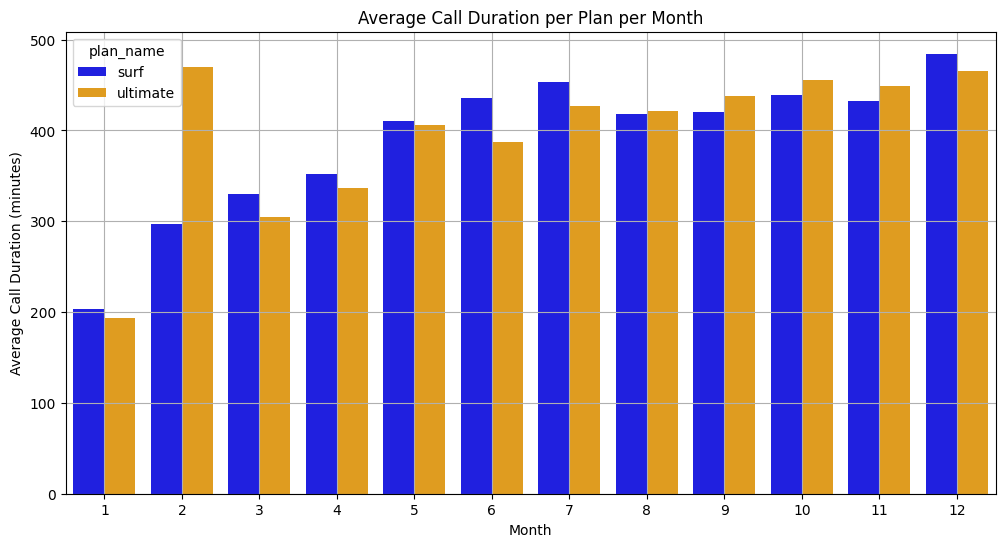

In [129]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#teniendo en cuenta lo solicitado, agrupamos los datos por plan y mes y calculamos el promedio de minutos por llamadas para cada grupo. 
#Convertimos el resultado en un dataframe normal.
average_call_duration = user_monthly_activity.groupby(['plan_name', 'month'])['call_minutes'].mean().reset_index()
print(average_call_duration.head())

#Creamos el grafico de barras con plt que nos muestra el mismo segun las caracteristicas que le damos en tamaño. Se configura el grafico según lo que queremos mostrar, 
#establecemos colores para cada plan. 

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='call_minutes', hue='plan_name', data=average_call_duration, palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.grid(True)
plt.show()


# podemos ver que ambos planes muestran un aumento en la duracion promedio de la llamada a lo largo del ano, con un aumento para finales de ano. 
#se evidencia una tendencia a que el ultimate plan, tiene una duracion promedio de llamadas por encima del surf plan, pero la diferencia no es muy significativa en todos los meses. 
#Podriamos decir hasta aqui, que el plan ultimate, tiene un publico que realiza llamadas un poco mas largas que los del surf plan, no obstante, ambos planes tienen 
#comportamientos similares durante el ano. 


,user_id,month,call_minutes,call_count,internet_used,message_count,plan_name,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,message_revenue,call_revenue,internet_revenue,monthly_revenue
720,1001,8,182.0,27.0,6919.15,30.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.000000,20.000000
721,1001,9,315.0,49.0,13314.82,44.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.000000,20.000000
722,1001,10,393.0,65.0,22330.49,53.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.09,0.0,68.076172,88.166172
723,1001,11,426.0,64.0,18504.30,36.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,30.712891,50.712891
724,1001,12,412.0,56.0,19369.18,44.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,39.160156,59.160156


,user_id,month,call_minutes,call_count,internet_used,message_count,plan_name,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,message_revenue,call_revenue,internet_revenue,monthly_revenue
0,1000,12,124.0,16.0,1901.47,11.0,ultimate,GA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
1,1006,11,10.0,2.0,2068.37,15.0,ultimate,CA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
2,1006,12,59.0,9.0,32118.82,139.0,ultimate,CA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,9.563477,79.563477
3,1008,10,476.0,71.0,17106.99,21.0,ultimate,FL,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
4,1008,11,446.0,63.0,23676.72,37.0,ultimate,FL,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000


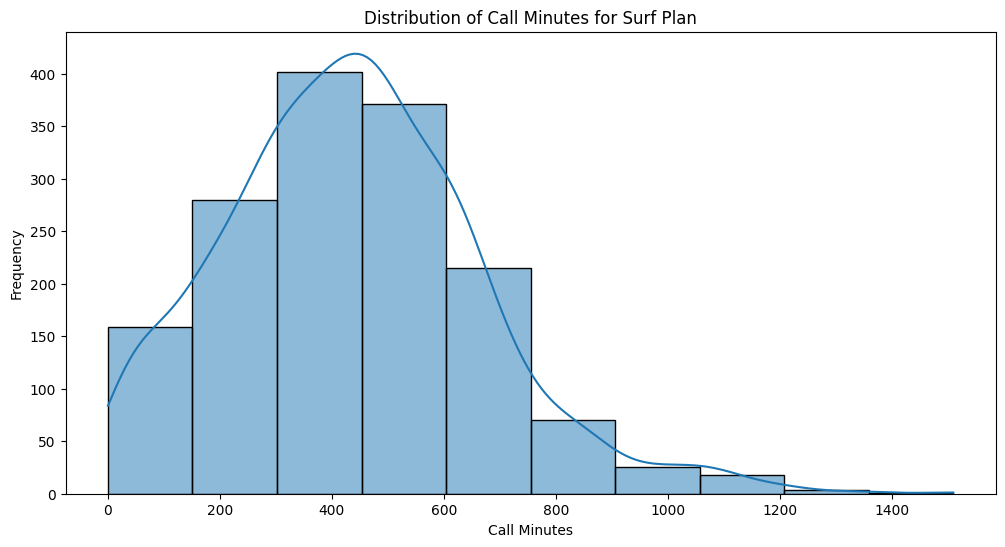

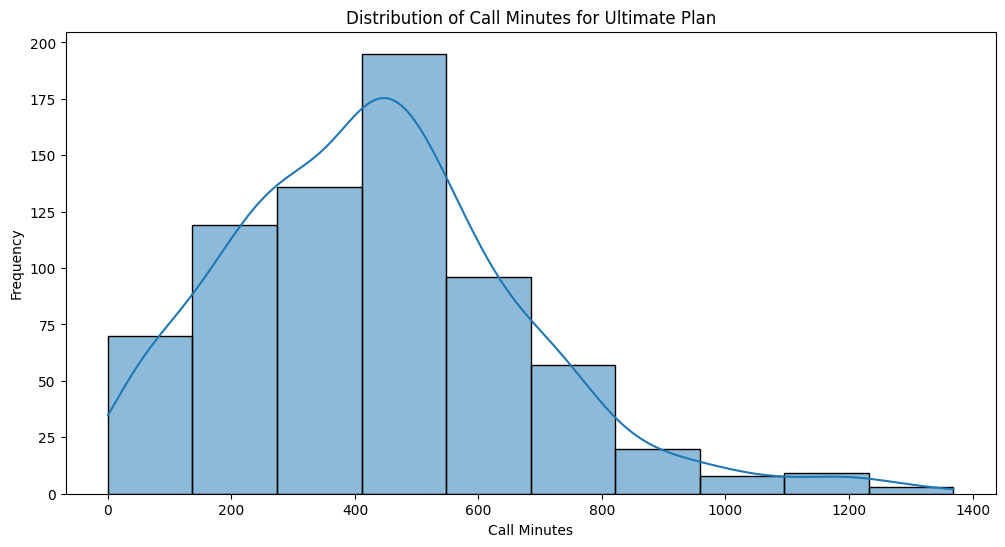

In [130]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Mostramos el comportamiento de cada plan por separado y de la misma manera graficamos.
#mostramos con display para obtener una mejor impresion de los resultados. 
surf_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'surf']
ultimate_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'ultimate']
display(surf_plan_data.head())
display(ultimate_plan_data.head())
print()
print()
print()

#Generamos los histogramas para cada uno de los planes tomando como referencia los minutos usados en cada plan.
plt.figure(figsize=(12, 6))
sns.histplot(data=surf_plan_data, x='call_minutes', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Call Minutes for Surf Plan')
plt.xlabel('Call Minutes')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=ultimate_plan_data, x='call_minutes', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Call Minutes for Ultimate Plan')
plt.xlabel('Call Minutes')
plt.ylabel('Frequency')
plt.show()


Calculamos la media y la varianza de la duración de las llamadas con el fin de averiguar el comportamiento de los usuarios respecto a cada plan, mediante la cual podemos observar que ambos tienden graficos de distribucion tienden a la derecha, para ambos planes los usuarios tienen hacer llamadas mas cortas, es aqui donde se muestra la mayoe concentracion de minutos consumidos. Sin embargo la cola a la derecha de ambas graficas, pero mas para la de ultimate plan, suguiere que un numero de usuarios realiza llamadas un poco mas extendidas. 

In [131]:
# Calcula la media y la varianza de la duración mensual de llamadas.

stats_by_plan = user_monthly_activity.groupby('plan_name')['call_minutes'].agg(['mean', 'var', 'median'])
print(stats_by_plan)


                 mean           var  median
plan_name                                  
surf       436.519741  52571.063243   430.0
ultimate   434.676017  56573.632247   425.0


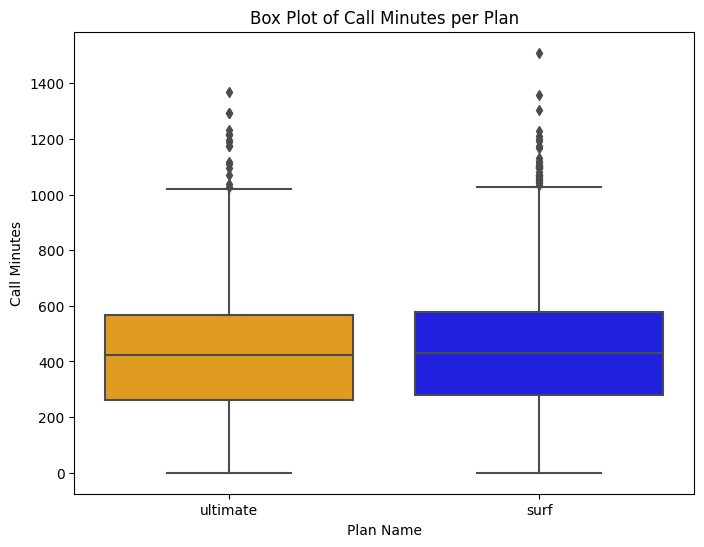

In [132]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(8, 6))
sns.boxplot(data=user_monthly_activity, x='plan_name', y='call_minutes', palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Box Plot of Call Minutes per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Call Minutes')
plt.show()

Calculamos la media y la varianza de la duración de las llamadas con el fin de averiguar el comportamiento de los usuarios respecto a cada plan, mediante la cual podemos observar que ambos tienden graficos de distribucion tienden a la derecha, para ambos planes los usuarios tienen hacer llamadas mas cortas, es aqui donde se muestra la mayor concentracion de minutos consumidos. Sin embargo la cola a la derecha de ambas graficas, pero mas para la de ultimate plan, suguiere que un numero de usuarios realiza llamadas un poco mas extendidas. 

podemos ver que ambos planes muestran un aumento en la duracion promedio de la llamada a lo largo del año, con un aumento para finales de año. 
#se evidencia una tendencia a que el ultimate plan, tiene una duracion promedio de llamadas por encima del surf plan, pero la diferencia no es muy significativa en todos los meses. 
#Podriamos decir hasta aqui, que el plan ultimate, tiene un publico que realiza llamadas un poco mas largas que los del surf plan, no obstante, ambos planes tienen comportamientos similares durante el año. 

Al calcular la mediana y observas los boxplot, podemos ver que las medianas para ambos planes son similares, lo que sugiere que el 50% de los usuarios de los planes en estudio tienen una duración de llamada similares. 
Para ambos planes los graficos y los bigotes muestran un rango similar de los datos. Ambos planes muestran valores atipicos representando esas llamadas que tienen una duracion mayor. 


### Mensajes

  plan_name  month  message_count
0      surf      1      21.000000
1      surf      2      21.600000
2      surf      3      21.937500
3      surf      4      24.166667
4      surf      5      33.017857


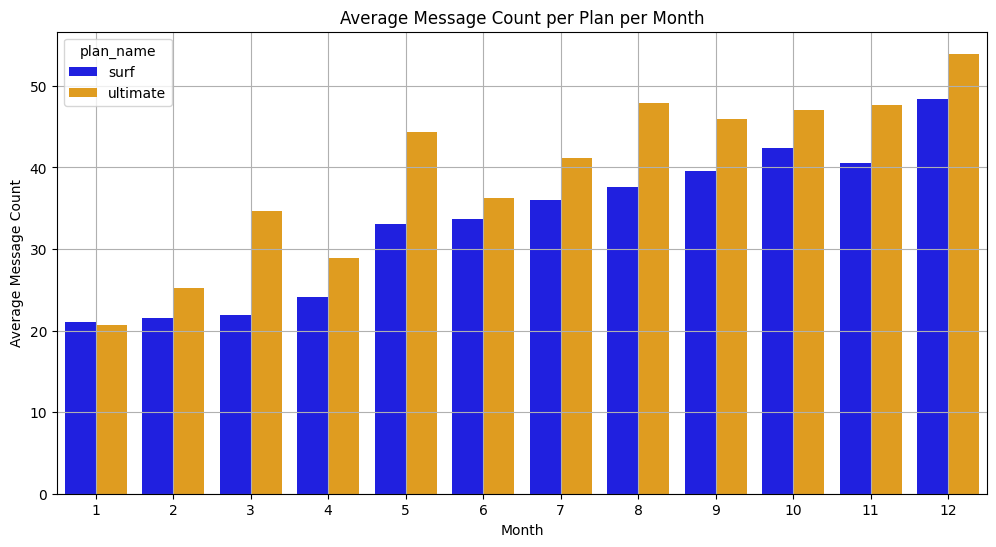

In [133]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#teniendo en cuenta lo solicitado, agrupamos los datos por plan y mes y calculamos el promedio de mensajes enviadas para cada grupo. 
#Convertimos el resultado en un dataframe normal.
average_messages = user_monthly_activity.groupby(['plan_name', 'month'])['message_count'].mean().reset_index()
print(average_messages.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='message_count', hue='plan_name', data=average_messages, palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Average Message Count per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Message Count')
plt.grid(True)
plt.show()


#Se evidencia la misma situacion ocurrida para los minutos, a medida que pasa el año, tienen a aumentar en cada uno de los planes la cantidad
#de mensajes que se envian, siendo consecuente con que para el plan ultimate, hay una ligera diferencia debido a que presenta mayor cantidad
#de mensajes enviados respecto al plan surf

,user_id,month,call_minutes,call_count,internet_used,message_count,plan_name,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,message_revenue,call_revenue,internet_revenue,monthly_revenue
720,1001,8,182.0,27.0,6919.15,30.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.000000,20.000000
721,1001,9,315.0,49.0,13314.82,44.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.000000,20.000000
722,1001,10,393.0,65.0,22330.49,53.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.09,0.0,68.076172,88.166172
723,1001,11,426.0,64.0,18504.30,36.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,30.712891,50.712891
724,1001,12,412.0,56.0,19369.18,44.0,surf,WA,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,39.160156,59.160156


,user_id,month,call_minutes,call_count,internet_used,message_count,plan_name,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,message_revenue,call_revenue,internet_revenue,monthly_revenue
0,1000,12,124.0,16.0,1901.47,11.0,ultimate,GA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
1,1006,11,10.0,2.0,2068.37,15.0,ultimate,CA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
2,1006,12,59.0,9.0,32118.82,139.0,ultimate,CA,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,9.563477,79.563477
3,1008,10,476.0,71.0,17106.99,21.0,ultimate,FL,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000
4,1008,11,446.0,63.0,23676.72,37.0,ultimate,FL,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.0,0.000000,70.000000


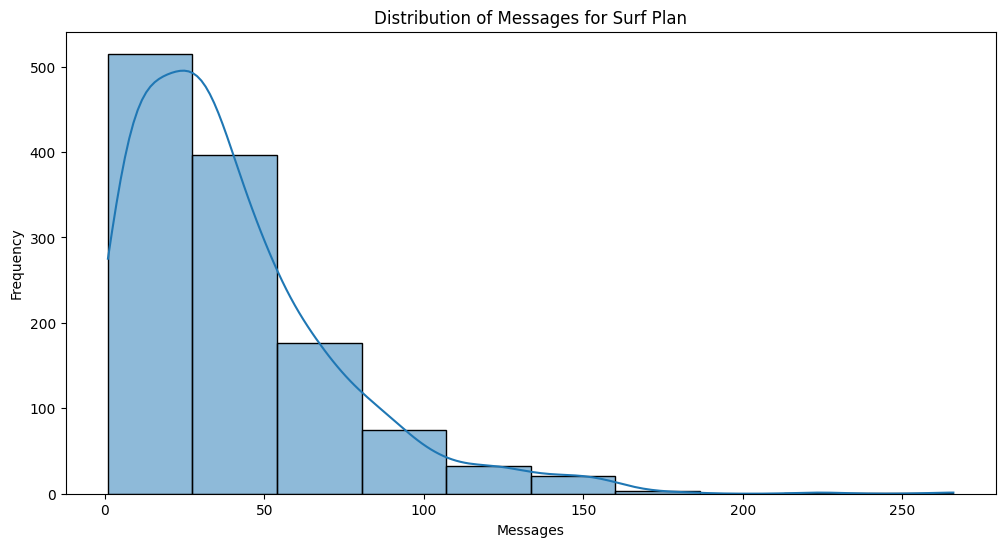

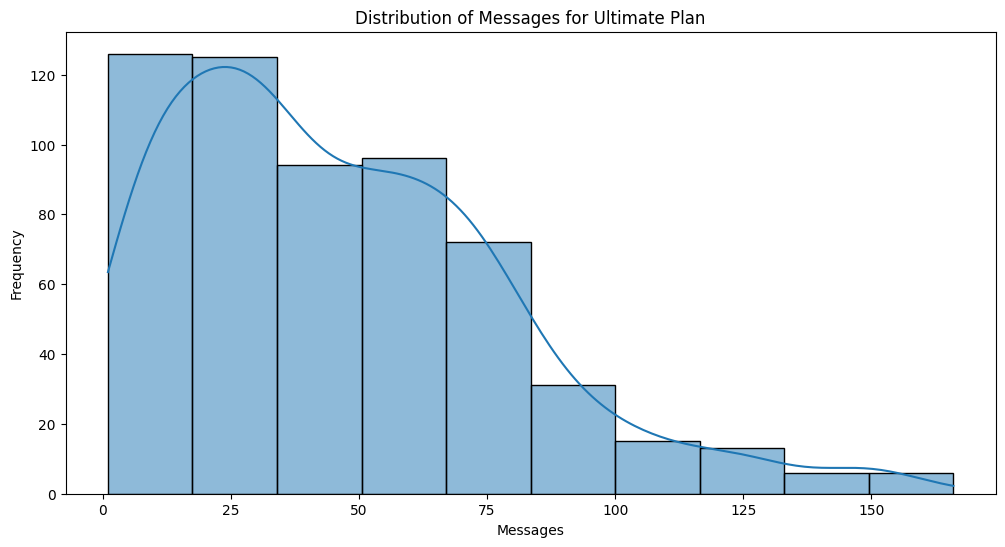

In [134]:
surf_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'surf']
ultimate_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'ultimate']
display(surf_plan_data.head())
display(ultimate_plan_data.head())
print()
print()
print()

#Generamos los histogramas para cada uno de los planes tomando como referencia los mensajes enviados en cada plan.
plt.figure(figsize=(12, 6))
sns.histplot(data=surf_plan_data, x='message_count', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Messages for Surf Plan')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=ultimate_plan_data, x='message_count', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Messages for Ultimate Plan')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.show()

                mean          var  median
plan_name                                
surf       40.109656  1091.344231    32.0
ultimate   46.296233  1085.183108    41.0




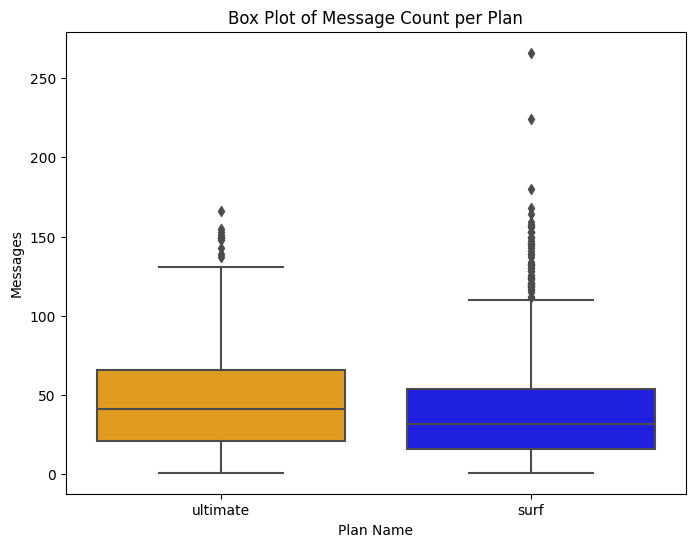

In [135]:
#calculamos la media, varianza y mediana de los mensajes enviados para cada plan. 

stats_by_plan = user_monthly_activity.groupby('plan_name')['message_count'].agg(['mean', 'var', 'median'])
print(stats_by_plan)

print()
print()

# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes

plt.figure(figsize=(8, 6))
sns.boxplot(data=user_monthly_activity, x='plan_name', y='message_count', palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Box Plot of Message Count per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Messages')
plt.show()


In [136]:
#Para ambos planes podemos evidenciar que la forma de los boxplot son similares, sin embargo, la media y mediana calculados para ambos casos, 
#sugiere que el plan ultimate tiene una tendencia a que sus usuarios envien mayor cantidad de mensajes (41.0) al mes con un comportamiento ¨normal¨ dentro
#de la mayoria de los usuario. Tambien podemos ver que hay bastantes datos atipicos para el plan surf, datos por fuera de los bigotes que sugieren que hay 
#un mayor uso de los mensajes en este plan, en comparacion con el ultimate.

### Internet

  plan_name  month  internet_used
0      surf      1    4874.860000
1      surf      2   12178.843333
2      surf      3   13345.440000
3      surf      4   12228.778571
4      surf      5   14119.728026


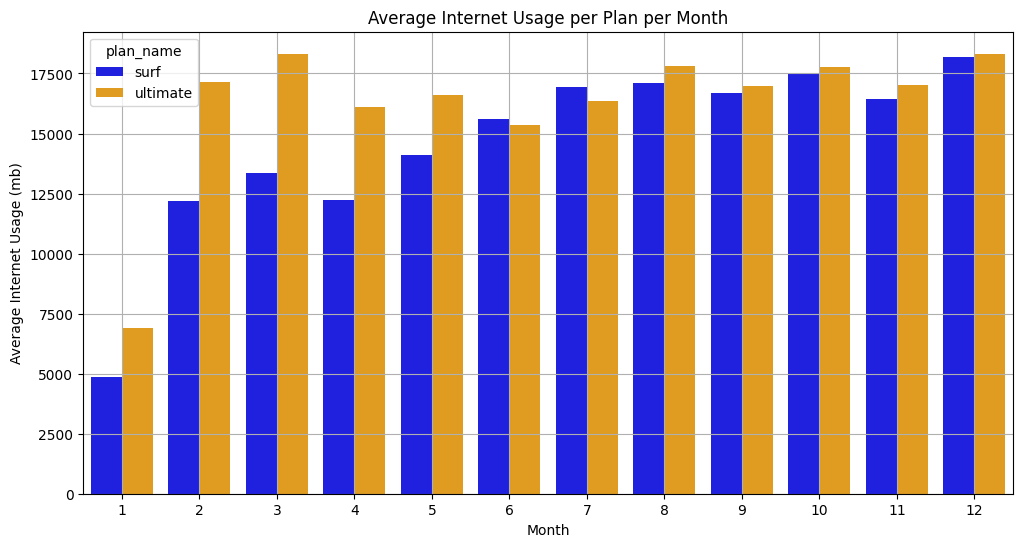




                   mean           var    median
plan_name                                      
surf       16717.702137  6.216823e+07  16923.83
ultimate   17238.642253  6.132485e+07  16863.45


In [137]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan - usamos el mismo patron de analisis que hemos estamos usando
#para cada variable durante el ejercicio. 

average_internet = user_monthly_activity.groupby(['plan_name', 'month'])['internet_used'].mean().reset_index()
print(average_internet.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='internet_used', hue='plan_name', data=average_internet, palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Average Internet Usage per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (mb)')
plt.grid(True)
plt.show()

print()
print()
print()

stats_by_plan = user_monthly_activity.groupby('plan_name')['internet_used'].agg(['mean', 'var', 'median'])
print(stats_by_plan)

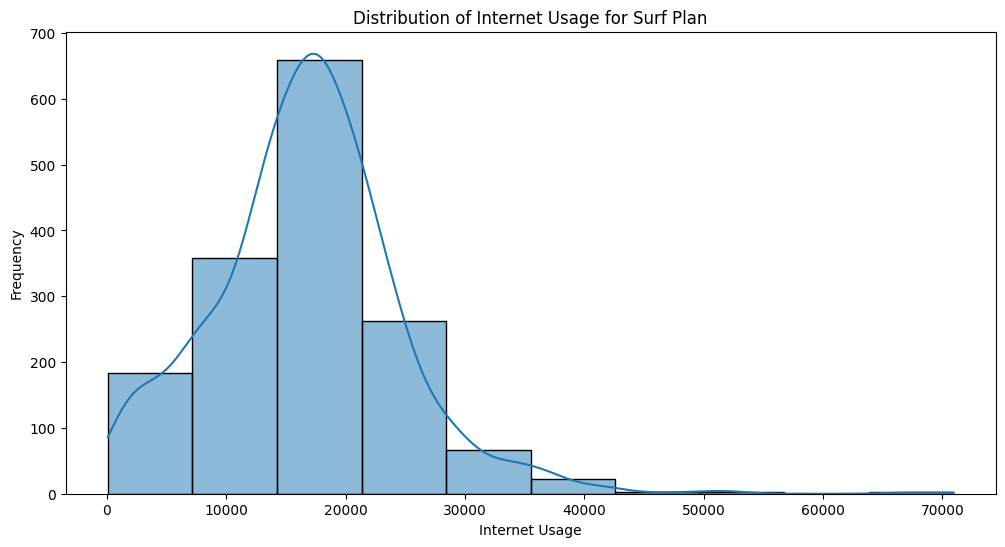

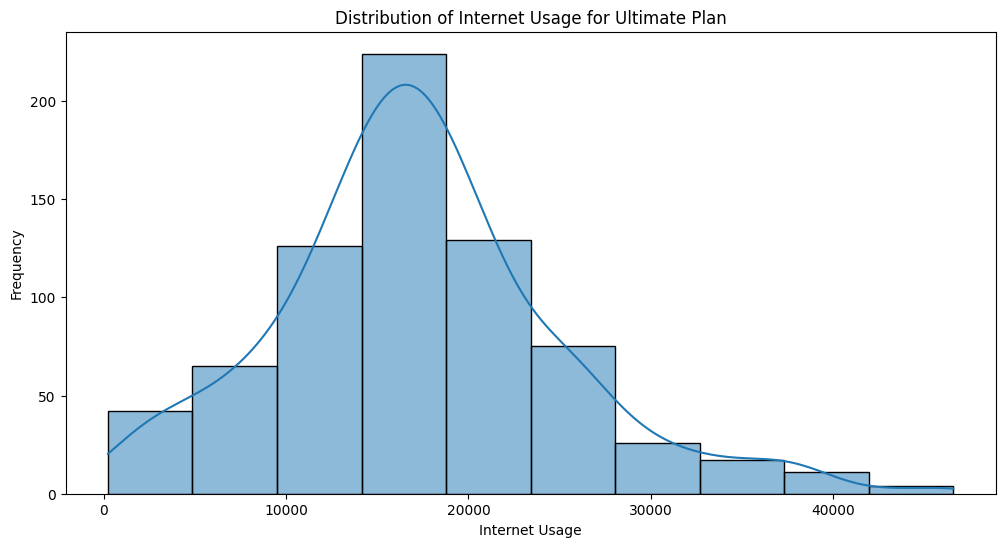

In [138]:
surf_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'surf']
ultimate_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'ultimate']

plt.figure(figsize=(12, 6))
sns.histplot(data=surf_plan_data, x='internet_used', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Internet Usage for Surf Plan')
plt.xlabel('Internet Usage')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=ultimate_plan_data, x='internet_used', multiple='dodge', bins=10, kde=True)
plt.title('Distribution of Internet Usage for Ultimate Plan')
plt.xlabel('Internet Usage')
plt.ylabel('Frequency')
plt.show()

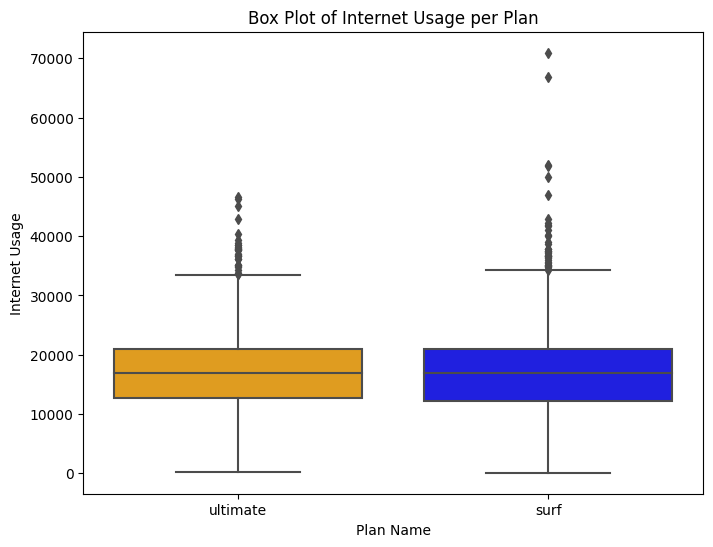

In [139]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad de internet consumido
plt.figure(figsize=(8, 6))
sns.boxplot(data=user_monthly_activity, x='plan_name', y='internet_used', palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Box Plot of Internet Usage per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Internet Usage')
plt.show()

In [140]:
#Ambos planes muestran una tendencia general al aumento en el uso de internet a lo largo del año, similar a lo que vimos con las llamadas.
#Los usuarios del plan ultimate parecen tener un uso promedio de internet ligeramente mayor que los usuarios del plan 
#surf en la mayoría de los meses, especialmente hacia el final del año, tal y como sucede con cada una de las variables que hemos graficado en 
#pasos anteriores. 
#En los histogramas se puede ver que para ambos planes, el comportamiento del uso de los datos es similar, siendo un poco más alto para el plan ultimate, en ambas 
#campanas se evidencia una ligera tendencia a tener una asimetria a la derecha, aunque no tan evidente como para las demás variables, los datos 
#se acomodan para el internet, de una manera mas central. 
#Los valorea atipicos se encuentran en ambos planes, lo que reitera que aunque no son la mayoria, existe un numero de usuarios que consume una 
#mayor cantidad de datos. 

## Ingreso

  plan_name  month  monthly_revenue
0      surf      1        20.000000
1      surf      2        33.146667
2      surf      3        43.732150
3      surf      4        39.035014
4      surf      5        45.741387


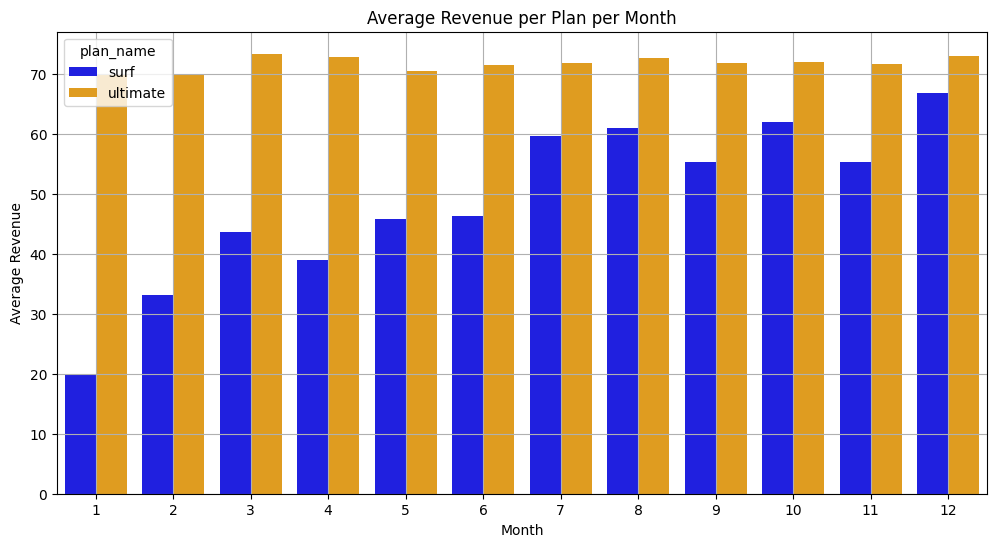

In [141]:

average_revenue = user_monthly_activity.groupby(['plan_name', 'month'])['monthly_revenue'].mean().reset_index()
print(average_revenue.head())

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan_name', data=average_revenue, palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Average Revenue per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

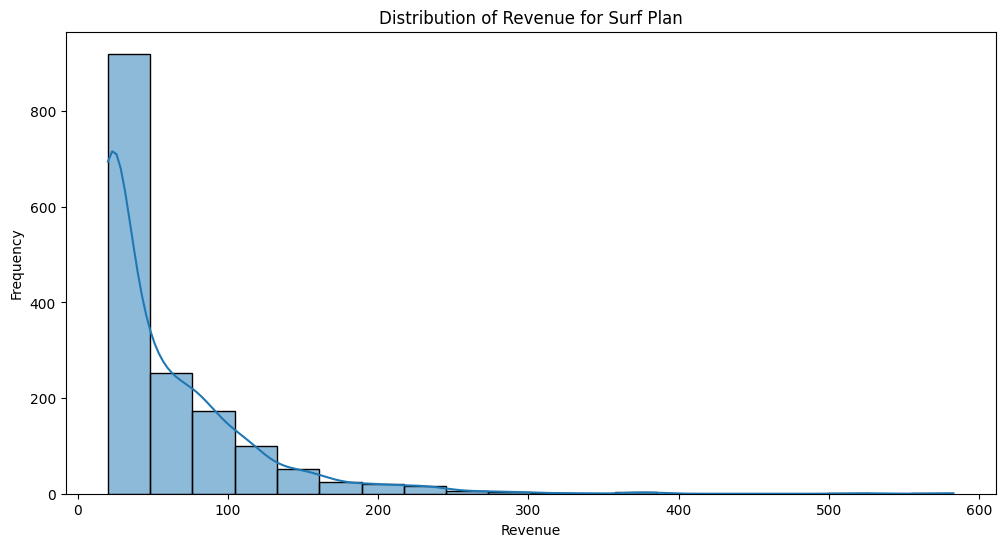

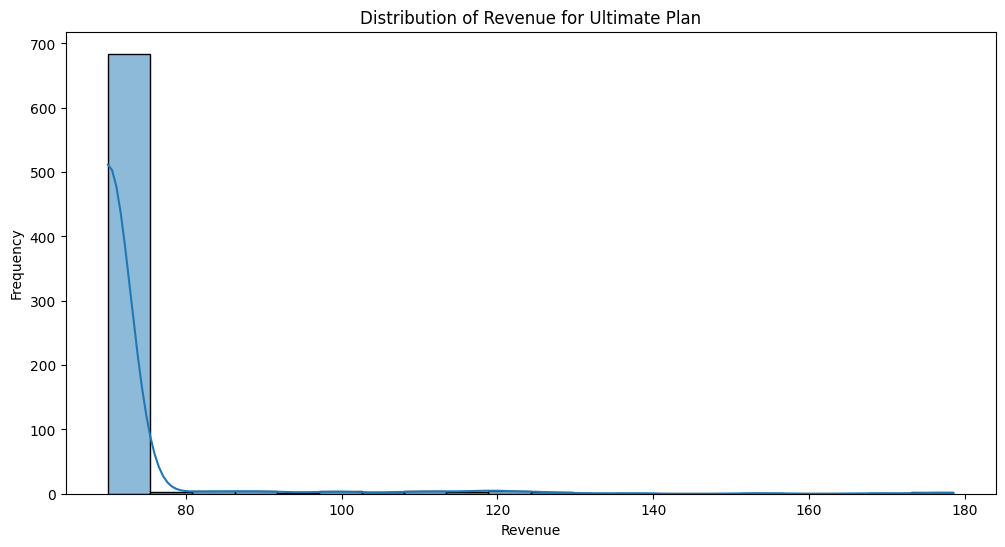



                mean          var     median
plan_name                                   
surf       57.675606  2901.088442  37.387187
ultimate   72.116292   115.983905  70.000000


In [142]:

surf_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'surf']
ultimate_plan_data = user_monthly_activity[user_monthly_activity['plan_name'] == 'ultimate']

plt.figure(figsize=(12, 6))
sns.histplot(data=surf_plan_data, x='monthly_revenue', multiple='dodge', bins=20, kde=True)
plt.title('Distribution of Revenue for Surf Plan')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=ultimate_plan_data, x='monthly_revenue', multiple='dodge', bins=20, kde=True)
plt.title('Distribution of Revenue for Ultimate Plan')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

print()
print()

stats_by_plan = user_monthly_activity.groupby('plan_name')['monthly_revenue'].agg(['mean', 'var', 'median'])
print(stats_by_plan)


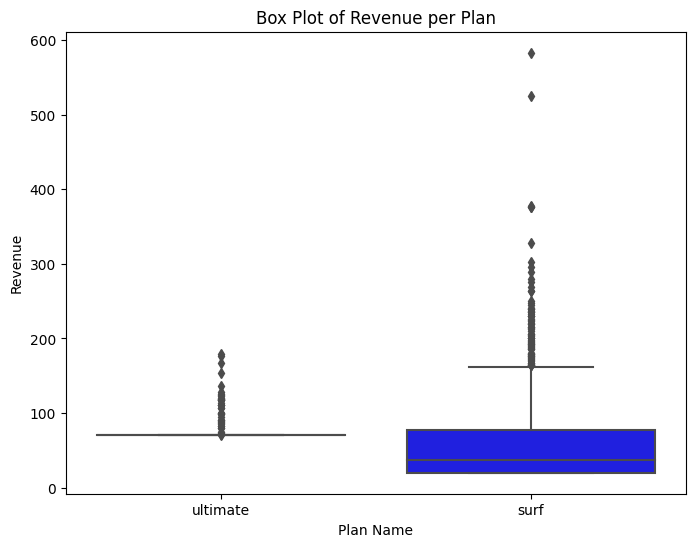

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=user_monthly_activity, x='plan_name', y='monthly_revenue', palette={'surf': 'blue', 'ultimate': 'orange'})
plt.title('Box Plot of Revenue per Plan')
plt.xlabel('Plan Name')
plt.ylabel('Revenue')
plt.show()

In [145]:
#El plan ultimate consistentemente genera un ingreso promedio mensual más alto que el plan Surf
#El ingreso promedio del plan Ultimate se mantiene estable a lo largo de los meses, alrededor de los $70.
#El ingreso promedio del plan Surf es significativamente más bajo al principio del año, pero aumenta gradualmente a lo largo de los meses,
#acercándose al ingreso del plan Ultimate hacia el final del año. Esto sugiere que los usuarios de Surf pueden estar incurriendo en cargos 
#adicionales por encima de su asignación gratuita a medida que avanza el año.
#El histograma de esta variable nos permite sugerir que los usuario del plan ultimate, en su mayoria mantienen el pago del fijo del mes. 
#El histograma del plan surf muestra un pico en la tarifa mensual base,  con una cola larga a la derecha, esto nos sugiere que, 
#la mayoría de los usuarios de Surf exceden sus límites y pagan cargos adicionales, lo que resulta en ingresos mensuales más altos.
#Estas mismas conclusiones las podemos ver reflejadas en las graficas de cajas, El plan ultimate genera ingresos más altos y estables, 
#con la mayoría de los usuarios pagando solo la tarifa base. El plan surf genera ingresos promedio más bajos, pero con una mayor 
#variabilidad debido a los usuarios que exceden sus límites y pagan cargos adicionales. El aumento del ingreso promedio del plan 
#surf a lo largo del año sugiere que el uso de datos, llamadas o mensajes por encima de los límites gratuitos es un factor importante 
#en la generación de ingresos para este plan.


## Prueba las hipótesis estadísticas

#Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

# Prueba las hipótesis teniendo en cuenta lo solicitado: definición de hipótesis, la selección de la prueba estadística y 
#la determinación del valor alfa

#Planteamiento:

#H₀ (nula): ingresos promedio del plan surf son iguales a los ingresos promedios del plan ultimate
#H₁ (alternativa): ingresos promedio del plan surf son diferentes a los ingresos promedios del plan ultimate
#Prueba estadistica: t-studen con muestras de varianzas diferentes (prueba de Welch)

#Podemos evidenciar entonces con los resultados obtenidos de esta prueba de hipotesis Basados en el p-value, se rechaza la hipotesis nula.
Hay una diferencia significativa en el ingreso promedio entre los usuarios del plan ultimate y el plan surf. 
Con esto sugiere que el equipo comercial deberia ajustar el presupuesto de publicidad e invertir en la promoción del plan ultimate, el cual es el que genera mayor ingreso promedio de los dos planes estudiados. 

In [153]:
# Prueba las hipótesis teniendo en cuenta lo solicitado: definición de hipótesis, la selección de la prueba estadística y 
#la determinación del valor alfa

#Planteamiento:

#H₀ (nula): ingresos promedio del plan surf son iguales a los ingresos promedios del plan ultimate
#H₁ (alternativa): ingresos promedio del plan surf son diferentes a los ingresos promedios del plan ultimate
#Prueba estadistica: t-studen con muestras de varianzas diferentes. 
alpha = 0.05 #95% de confianza
#separamos los datos por plan y realizamos aplicamos el t'test para determinar si hay una diferentencia estadistica significativa entre
# el promedio de los ingresos mensuales por plan. 

surf_revenue = user_monthly_activity[user_monthly_activity['plan_name'] == 'surf']['monthly_revenue']
ultimate_revenue = user_monthly_activity[user_monthly_activity['plan_name'] == 'ultimate']['monthly_revenue']

t_statistic, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

print(f"Alpha value: {alpha}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Basados en el p-value, se rechaza la hipotesis nula.")
    print("Hay una diferencia significativa en el ingreso promedio entre los usuarios del plan ultimate y el plan surf.")
else:
    print("Basados en el p-value, no podemos rechazar la hipotesis nula.")
    print("No hay una diferencia significativa en el ingreso promedio entre los usuarios del plan ultimate y el plan surf..")


print(f"Ingreso promedio Surf: ${surf_revenue.mean():.2f}")
print(f"Ingreso promedio Ultimate: ${ultimate_revenue.mean():.2f}")

T-statistic: -10.19737105416095
P-value: 8.70606754305799e-24
Alpha value: 0.05
P-value: 8.70606754305799e-24
Basados en el p-value, se rechaza la hipotesis nula.
Hay una diferencia significativa en el ingreso promedio entre los usuarios del plan ultimate y el plan surf.
Ingreso promedio Surf: $57.68
Ingreso promedio Ultimate: $72.12


#Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

#H₀ (nula): El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones
#H₁ (alternativa):El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones

#Prueba estadistica: t-studen con muestras de varianzas diferentes. 
alpha = 0.05 #95% de confianza

In [154]:
# Prueba las hipótesis
#Preparamos los datos toda vez que, separando lo datos de la actividad mensual de los usuarios en 
#los que hacen parte del area metropolitana de Nueva York-Nueva Jersey-Pensilvania (NY-NJ-PA MSA) y 
#aquellos que se encuentran en otras regiones.
#hacemos el merge de user_monthly_activity con users_df para incluir la columna state para cada usuaios, esto se agrego en la parte de arriba
#cuaderno.

ny_nj_users_df = user_monthly_activity[user_monthly_activity['state'] == 'NY-NJ-PA']
other_users_df = user_monthly_activity[user_monthly_activity['state'] != 'NY-NJ-PA']

print(f"DataFrame de usuarios del area metropolitana de Nueva York-Nueva Jersey-Pensilvania (NY-NJ-PA MSA)")
print(ny_nj_users_df.head())
print()
print(f"DataFrame de usuarios de otras regiones")
print(other_users_df.head())
print()
print()

alpha = 0.05

ny_nj_revenue = ny_nj_users_df['monthly_revenue']
other_revenue = other_users_df['monthly_revenue']

t_statistic, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Basados en el p-value, se rechaza la hipotesis nula.")
    print("Hay una diferencia significativa entre el ingreso promedio entre los usuarios del área NY-NJ y al ingreso promedio de los usuarios de otras regiones.")
else:
    print("Basados en el p-value, no podemos rechazar la hipotesis nula.")
    print("No hay una diferencia significativa entre el ingreso promedio entre los usuarios del área NY-NJ y al ingreso promedio de los usuarios de otras regiones.")

print(f"Ingreso promedio Surf: ${ny_nj_users_df['monthly_revenue'].mean():.2f}")
print(f"Ingreso promedio Ultimate: ${other_users_df['monthly_revenue'].mean():.2f}")



DataFrame de usuarios del area metropolitana de Nueva York-Nueva Jersey-Pensilvania (NY-NJ-PA MSA)
    user_id  month  call_minutes  call_count  internet_used  message_count  \
29     1031      7         304.0        36.0       10653.04            1.0   
30     1031      8         483.0        62.0       21615.94            2.0   
31     1031      9         515.0        76.0       13005.92            3.0   
32     1031     10         563.0        74.0       18775.73            2.0   
33     1031     11         611.0        85.0       16198.94            1.0   

   plan_name     state  messages_included  mb_per_month_included  \
29  ultimate  NY-NJ-PA               1000                  30720   
30  ultimate  NY-NJ-PA               1000                  30720   
31  ultimate  NY-NJ-PA               1000                  30720   
32  ultimate  NY-NJ-PA               1000                  30720   
33  ultimate  NY-NJ-PA               1000                  30720   

    minutes_included  u

##Podemos evidenciar entonces con los resultados obtenidos de esta prueba de hipotesis Basados en el p-value, se rechaza la hipotesis nula. #Hay una diferencia significativa entre el ingreso promedio entre los usuarios del área NY-NJ y al ingreso promedio de los usuarios de otras regiones. Con esto sugiere que el equipo comercial deberia ajustar el presupuesto de publicidad y las estrategias de marketing para las diferentes regiones. Aunque la diferencia en los promedios calculados ( 57.51 vs 63.14) no parece grande, la prueba estadística confirma que esta diferencia no es probable que sea resultado del azar, por lo cual se deberia realizar la investigacion teniendo en cuenta otras variables que podrian afectar la toma de decisiones. 

In [ ]:
## Conclusión general
#En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones)
#importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.

#1. En cada una de las variables estudiadas, para cada plan, surf y ultimate, a medida que van pasando los meses del ano, se evidencia un aumento en 
#general del uso de los beneficios que estos traen. 
#2. los Histogramas mostraron que las distribuciones de la duración de las llamadas, el recuento de mensajes y el uso de internet tienden a 
#la derecha en ambos planes, lo que indica que la mayoría de los usuarios tienen un uso moderado, pero hay un grupo de usuarios 
#con un uso significativamente mayor.
#Aunque hay algunas diferencias en los promedios mensuales de uso entre los planes, la dispersión y los patrones generales de uso de llamadas 
#y datos son bastante similares entre ambos planes. Los usuarios de ultimate tienden a enviar más mensajes en promedio que los de surf.
#El plan ultimate genera un ingreso promedio mensual más alto y más estable ($72.31) en comparación con el plan surf ($60.71). Lo que nos sugiere que
#la mayoria de los ingresos de ultimate viene de la tarifa base del plan, ya que la gran mayoria de los clienten respetan los limites del plan.
#Por otro lado para el plan surf pasa lo contrario el promedio de ingresos ($60.71) esta bastante alejado de su tarifa mensual ($20), lo que
#sugiere que, para estos usuario la capacidad ofrecida no es suficiente y en la mayoria de los casos que generan cargos adicionales por exceder
#los limites del plan. 
#Podemos evidenciar entonces con los resultados obtenidos de esta prueba de hipotesis Basados en el p-value, se rechaza la hipotesis nula. 
#Hay una diferencia significativa entre el ingreso promedio entre los usuarios del área NY-NJ y al ingreso promedio de los usuarios de 
#otras regiones. Con esto sugiere que el equipo comercial deberia ajustar el presupuesto de publicidad y las estrategias de marketing para 
#las diferentes regiones. Aunque la diferencia en los promedios calculados ( 57.51 vs 63.14) no parece grande, la prueba estadística 
#confirma que esta diferencia no es probable que sea resultado del azar, por lo cual se deberia realizar la investigacion teniendo en 
#cuenta otras variables que podrian afectar la toma de decisiones. 
#Teniendo en cuenta la diferencia significativa de los ingresos promedios entre los planes, la empresa deberia considerar estrategias que permitan
#la optinizacion de los planes y mejorar la oferta a los usuarios. Crear campanas de fidelizacion para los clientes de ultimate que son mas
#consistentes en el uso de los beneficios del plan, y empezar a evaluar la manera de migrar del plan surf al ultimate, los clientes que estan
#gastando el valor de la tarifa de dicho plan, de esta manera no se sentiran pagando en exceso, si no mas acomodados a sus caracteristicas contratadas. 
